# 파이썬으로 배우는 통계학 교과서
## 3.9. 평균값의 차이 검정

### 분석 준비

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

In [3]:
# 데이터 읽기
paired_test_data = pd.read_csv(
    "3-9-1-paired-t-test.csv")
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              37.2
2      C   before              35.3
3      D   before              36.1
4      E   before              37.1
5      A    after              36.8
6      B    after              37.1
7      C    after              36.8
8      D    after              37.1
9      E    after              37.9


### 3.9.4. 대응표본 t검정

In [4]:
# 대응 표본 t 검정 (paired t-test)
# : 같은 집단에 대해 전/후의 변화량을 비교. 
# : 동일한 subject가 양쪽 조건에 똑같이 존재하고, subject별로 변화량을 비교하는 것이 목적임.
# - 귀무가설(H0): 변화량이 없다 (ΔX = 0)

# 약을 먹기 전과 먹기 후의 표본평균
before = paired_test_data.query('medicine == "before"')["body_temperature"]
after = paired_test_data.query('medicine == "after"')["body_temperature"]
# 배열형으로 변환
before = np.array(before)
after = np.array(after)
# 차이 계산
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [ ]:
# 평균값이 0과 다른지 1집단 t검정 (one sample t-test), 결과 :  p-value가 유의 수준 0.05보다 작기 때문에 귀무가설을 기각한다.
stats.ttest_1samp(diff, 0) 

TtestResult(statistic=np.float64(2.901693483620596), pvalue=np.float64(0.044043109730074276), df=np.int64(4))

In [12]:
# ttest_rel을 이용한 t검정
stats.ttest_rel(after, before)

TtestResult(statistic=np.float64(2.901693483620596), pvalue=np.float64(0.044043109730074276), df=np.int64(4))

### 3.9.5. 독립표본 t검정

In [7]:
# 독립 표본 t 검정 (independent samples t-test 또는 two samples t-test)
# : 각각 따로 수집된 2개 집단의 차이를 비교. (두 집단의 subject들이 독자적임. 두 집단의 subject 수가 다를 수 있음.)
# - 귀무가설(H0): 두 집단 간의 차이가 없다. 

# 평균값
mean_bef = np.mean(before)
mean_aft = np.mean(after)

# 분산
sigma_bef = np.var(before, ddof = 1)
sigma_aft = np.var(after, ddof = 1)

# 샘플사이즈
m = len(before)
n = len(after)

# t값
t_value = (mean_aft - mean_bef) / np.sqrt((sigma_bef/m + sigma_aft/n))
t_value

1.877

In [8]:
stats.ttest_ind(after, before, equal_var = False)

TtestResult(statistic=np.float64(1.8766862336342118), pvalue=np.float64(0.10678214007696397), df=np.float64(6.375000592560282))

### 독립표본 t검정 vs. 대응표본 t검정 비교 (시각화 예시)

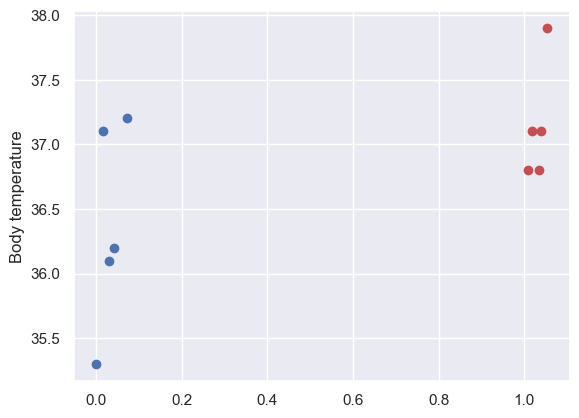

In [13]:
# 독립표본 t검정: 두 그룹을 별도의 집단으로 따로 나누어 각각 평균을 계산해 비교
np.random.seed(1)
plt.plot(np.random.rand(5)*0.1, before, 'bo')
plt.plot(1 + np.random.rand(5)*0.1, after, 'ro')
plt.ylabel('Body temperature')
plt.show()

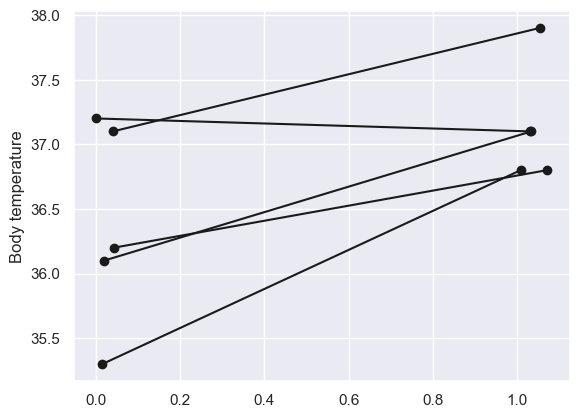

In [10]:
# 대응표본 t검정: 양쪽 그룹에서 대응되는 샘플의 변화량을 계산해, 그 변동을 비교.
np.random.seed(1)
for i in range(0, 5):
    plt.plot([0, 1]+np.random.rand(2)*0.1, [before[i], after[i]], 'ko-')
plt.ylabel('Body temperature')
plt.show()

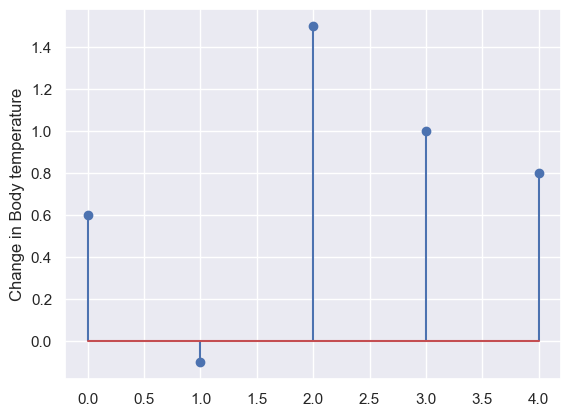

In [11]:
np.random.seed(1)
plt.stem(diff)
plt.ylabel('Change in Body temperature')
plt.show()